### BIOSTAT 257 Homework 1

### Question 2

#### Part I

Q: Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

In [2]:
x = 0.1
y = 0.1
z = 1.0

1.0

In [9]:
#informal check

In [7]:
(x + y) + z

1.2

In [8]:
x + (y + z)

1.2000000000000002

In [ ]:
#formal check

In [3]:
(x + y) + z == x + (y + z)

false

Solution: The above tests indicate that the associativity rule does not hold for floating-point numbers in Julia. Floating-point numbers are essentially scientific notation, and computers store numbers in binary; however, computers can only store a certain number of significant digits, and this often leads to us losing precision when doing math with floating numbers in computer programs. In summary, the reason why the associative laws of algebra don't hold for floating-point numbers is due to roundoff error. 

#### Part II

Q: Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

In [32]:
x = .333
y = .212
z = .919

0.919

In [33]:
(x * y) * z == x * (y * z)

false

Solution: It appears that floating-point numbers do not always obey the associative rule for multiplication in Julia (it depends on the floating-point numbers). 

#### Part III

Q: Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?

In [52]:
x = .47
y = .57
a = 257

257

In [53]:
a * (x + y) == a * x + a * y

false

Solution: It appears that floating-point numbers do not always obey the distributive in Julia (it depends on the floating-point numbers). 

#### Part IV

Q: Is `0 * x == 0` true for all floating-point number x?

In [99]:
x = Inf

Inf

In [100]:
0 * x == 0

false

In [113]:
x = NaN

NaN

In [114]:
0 * x == 0

false

Solution: It appears that floating-point numbers do not always obey the zero property of multiplication in Julia. The zero property appears to hold for any finite floating-point number, but for non-finite and NaNs, the rule does not hold.

#### Part V

Q: Is `x / a == x * (1 / a)` always true?

In [115]:
x = .23123
a = 9.999*10^4

99990.0

In [116]:
 x / a == x * (1 / a)

false

Solution: Based on the above output, it is not always true. 

### Question 3

Consider the Julia function:

In [139]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

#### Parts I and II

Q: 
1. Use `@code_llvm` to find the LLVM bitcode of compiled g with `Int64` input.
2. Use `@code_llvm` to find the LLVM bitcode of compiled g with `Float64` input.

Solution:

In [140]:
typeof(214)

Int64

In [141]:
typeof(214.0)

Float64

In [145]:
@code_llvm g(214)
#llvm for Int64 input

;  @ In[139]:1 within `g`
define i64 @julia_g_1682(i64 signext %0) #0 {
top:
;  @ In[139]:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ In[139]:5 within `g`
  ret i64 %2
}


In [138]:
g(2)

5469

In [144]:
@code_llvm g(214.0)
#llvm with Float64 input

;  @ In[139]:1 within `g`
define double @julia_g_1680(double %0) #0 {
top:
;  @ In[139]:3 within `g`
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:380 within `*` @ float.jl:405
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:381 within `-` @ float.jl:402
   %10 = fadd double %9, -1.000000e+

#### Part III

Q: Compare the bitcode from questions 1 and 2. What do you find?

Solution: The above output indicates the compiler works differently depending whether the input was of type `Int6` or `Float64`. When our input is of type `Int64`, the compiler only has two steps: it starts off by multiplying our input by $5^{10}$, and then subtracting $5^9 + 5^8 + 5^7 + ... + 5^0$ from this value. Alternatively, when our input is of type `Float64`, the compiler multiplies our input by 5, subtracts 1 from this value, and then iterates this five times. 

#### Part IV

Q: Read Julia documentation on @fastmath and repeat the questions 1-3 on the above function. Explain what does macro `@fastmath` does. 

In [154]:
#Repeating parts I to III with a function incorporating the macro fastmath

In [148]:
function g(k)
    @fastmath for i in 1:10
        k = 5k - 1
    end
    k
end

#rewriting function using fastmath macro

g (generic function with 1 method)

In [151]:
@code_llvm g(214)
#testing function for input Int54

;  @ In[148]:1 within `g`
define i64 @julia_g_1689(i64 signext %0) #0 {
top:
;  @ In[148]:3 within `g`
; ┌ @ fastmath.jl:270 within `mul_fast`
; │┌ @ int.jl:88 within `*`
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:270 within `sub_fast`
; │┌ @ int.jl:86 within `-`
    %2 = add i64 %1, -2441406
; └└
;  @ In[148]:5 within `g`
  ret i64 %2
}


In [152]:
@code_llvm g(214.0)
#testing function for input Int54

;  @ In[148]:1 within `g`
define double @julia_g_1691(double %0) #0 {
top:
;  @ In[148]:3 within `g`
; ┌ @ fastmath.jl:267 within `mul_fast` @ fastmath.jl:167
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:267 within `sub_fast` @ fastmath.jl:166
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[148]:5 within `g`
  ret double %2
}


Solution: `@fastmath` is a macro within Julia that enables faster (but rougher) execution of the expression in the function. Although the speed benefits of using `@fastmath` may be huge, the tradeoff with use of this macro is a potential loss in precision and accuracy.  

### Question 4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.

#### Part I

Q: Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.

Solution:

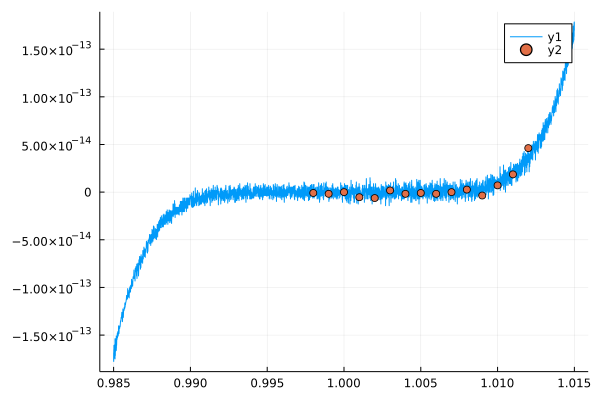

In [178]:
using Plots
x = collect(998:1012)/1000 #creates a vector from .998 to .1012
f(x) = y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1
plot(f, .985, 1.015) #plots function
scatter!(x,y) #plots points onto graph

#### Part II 

Q: Plot the polynomial `y = (x - 1)^7` at points `x`.

Solution: 

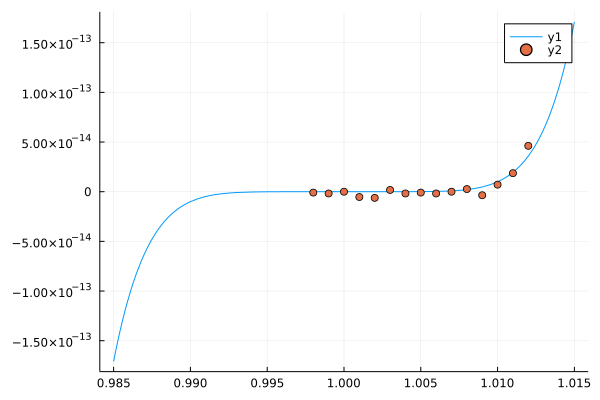

In [180]:
using Plots
f(x) = y = (x - 1)^7
plot(f, .985, 1.015) #plots function
scatter!(x,y) #plots points onto graph

#### Part III

Q: Explain what you found.

Solution: There appears to be significantly more noise in the first plot. Perhaps this is due to the fact that the way the first written is written involves many operations for calculation, leading to a higher frequency of rounding error. 

### Question 5

#### Part I

Q: Prove the **Sherman-Morrison** formula is true:
$$ (\mathbf{A} + \mathbf{uu^{T}})^\mathbf{-1} = (\mathbf{A^{-1}} - \frac{1}{1 + \mathbf{uA^{-1}u}}\mathbf{A^{-1}uu^{T}A^{-1}}) $$

Solution: 

\begin{align}
&(\mathbf{A} + \mathbf{uu^{T}})(\mathbf{A^{-1}} - \frac{1}{1 + \mathbf{uA^{-1}u}}\mathbf{A^{-1}uu^{T}A^{-1}}) \\
&= \mathbf{AA^{-1}A} - \frac{1}{1 + \mathbf{u^{T}A^{-1}u}}\mathbf{AA^{-1}uu^{T}}\mathbf{A^{-1} + uu^{T}A^{-1} + uu^{T}A^{-1}} + \frac{1}{1 + 
\mathbf{u^{T}A^{-1}u}}\mathbf{uu^{T}A^{-1}uu^{T}A^{-1}} \\
&= \mathbf{I} + \mathbf{uu^{T}A^{-1}} - \frac{\mathbf{u}(1 + \mathbf{u^{T}A^{-1}u})\mathbf{u^{T}A^{-1}}}{1 + \mathbf{u^{T}A^{-1}u}} \\
&= \mathbf{I} + \mathbf{uu^{T}A^{-1}} - \mathbf{uu^{T}A^{-1}} \\
&= \mathbf{I}
\end{align}


#### Part II

Q: Show the **Woodbury** formula is true:
$$\mathbf{(A + UV^{T})^{\mathbf{-1}} = (A^{-1} - A^{-1}U(I + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}}$$

Solution:

\begin{align}
&\mathbf{(A + UV^{T})(A^{-1} - A^{-1}U(I + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}} \\
&=\mathbf{AA^{-1} - AA^{-1}U(I + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} + UV^{T}A^{-1} - UV^{T}A^{-1}U(I + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}} \\
&=\mathbf{I + UV^{T}A^{-1} - U(I + V^{T}A^{-1}U)(I + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}} \\
&=\mathbf{ I + UV^{T}A^{-1} - UV^{T}A^{-1}} \\
&= \mathbf{I}
\end{align}

#### Part III

Q: Show the **binomial inversion** formula (where **A** and **B** are singular) is true:
$$\mathbf{(A + UBV^{T})^{\mathbf{-1}} = (A^{-1} - A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}}$$

Solution: 

\begin{align}
&\mathbf{(A + UBV^{T})(A^{-1} - A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}} \\
&=\mathbf{AA^{-1} - AA^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1} + UBV^{T}A^{-1} - UBV^{T}A^{-1}U(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}} \\
&=\mathbf{I + UBV^{T}A^{-1} - UB(B^{-1} + V^{T}A^{-1}U)(B^{-1} + V^{T}A^{-1}U)^{-1}V^{T}A^{-1}} \\
&=\mathbf{ I + UBV^{T}A^{-1} - UBV^{T}A^{-1}} \\
&= \mathbf{I}
\end{align}

#### Part IV

Q: Show the following identity is true:
$$det(\mathbf{A + UV{^T}}) = det(\mathbf{A})(\mathbf{I + A^{-1}UV^{T}})$$

Solution: 

$$det(\mathbf{A + UV{^T}}) = det(\mathbf{A(I + A^{-1}UV^{T})} = det(\mathbf{A})(\mathbf{I + A^{-1}UV^{T}})$$

### Question 6

#### Part 1 

Q: Show that the product of two upper (lower) triangular matrices is upper (lower) triangular.

Solution: 

In [199]:
upper1 = [1 2 3; 0 4 5; 0 0 6]
upper2 = [2 14 96; 0 10 10; 0 0 8]

3×3 Matrix{Int64}:
 2  14  96
 0  10  10
 0   0   8

In [200]:
upper1 * upper2

3×3 Matrix{Int64}:
 2  34  140
 0  40   80
 0   0   48

#### Part 2

Q: Show that the inverse of an upper (lower) triangular matrix is upper (lower) triangular.

Solution: 

In [201]:
inv(upper1)

3×3 Matrix{Float64}:
 1.0  -0.5   -0.0833333
 0.0   0.25  -0.208333
 0.0   0.0    0.166667

#### Part 3

Q: Show that the product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

Solution:

In [206]:
upper1_unit = [1 10 10; 0 1 3; 0 0 1]

3×3 Matrix{Int64}:
 1  10  10
 0   1   3
 0   0   1

upper2_unit = [1 2 21; 0 1 14; 0 0 1]

In [208]:
upper1_unit * upper2_unit

3×3 Matrix{Int64}:
 1  12  171
 0   1   17
 0   0    1

#### Part 4

Q: Show that the inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

Solution:

In [210]:
inv(upper1_unit)

3×3 Matrix{Float64}:
 1.0  -10.0  20.0
 0.0    1.0  -3.0
 0.0    0.0   1.0

#### Part 5

Q: Show that an orthogonal upper (lower) triangular matrix is diagonal.

Solution: Let $\mathbf{A}$ be an invertible upper triangular matrix. Then $\mathbf{A^{-1}}$ is also upper triangular and $\mathbf{A^{T}}$ is lower triangular. However, if $\mathbf{A}$ is an orthogonal matrix, then $\mathbf{A^{-1} = A^{T}}$. The only way this can be true is if $\mathbf{A}$ is a diagonal matrix.

#### Part 6

Q: Show that the product of two orthogonal matrices is orthogonal.

Solution: 

In [212]:
orth1 = [1/3 2/3 -2/3; -2/3 2/3 1/3; 2/3 1/3 2/3]

3×3 Matrix{Float64}:
  0.333333  0.666667  -0.666667
 -0.666667  0.666667   0.333333
  0.666667  0.333333   0.666667

In [216]:
orth2 = [1 0 0 ; 0 1 0 ; 0 0 -1]

3×3 Matrix{Int64}:
 1  0   0
 0  1   0
 0  0  -1

In [217]:
orth3 = orth1 * orth2

3×3 Matrix{Float64}:
  0.333333  0.666667   0.666667
 -0.666667  0.666667  -0.333333
  0.666667  0.333333  -0.666667

In [219]:
orth3 * transpose(orth3) #the product times its transpose is the identity which proves its orthogonal

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0